In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


In [9]:
data = pd.read_csv(r"C:\Users\84886\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\Desktop\IU\sem 2 năm 3\project 1\Dataset\cardio_train.csv", sep=';')
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data['years'] = (data['age'] / 365).round().astype('int')
data.drop(['age'], axis='columns', inplace=True)
data.drop(['id'], axis='columns', inplace=True)

data['bmi'] = data['weight']/((data['height']/100)**2)
rating = []
for row in data['bmi']:
    if row < 18.5: rating.append(1)
    elif row > 18.5 and row < 24.9: rating.append(2)
    elif row > 24.9 and row < 29.9: rating.append(3)
    elif row > 29.9 : rating.append(4)
data['bmi_rank'] = rating

data['MAP'] = ((2*data['ap_lo'])+data['ap_hi'])/3
map_rank = []
for row in data['MAP']:
    if row < 69.9: map_rank.append(1)
    elif row > 70 and row < 99.9: map_rank.append(2)
    elif row > 100: map_rank.append(3)
    else:           map_rank.append('Not_Rated')
data['MAP_rank'] = map_rank

data= data[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","bmi","years","bmi_rank","MAP_rank","cholesterol","gluc","smoke","active","cardio"]]


In [11]:
data.drop(['MAP_rank'], axis=1, inplace=True)
X= data.iloc[:,:14].values
y = data['cardio']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=0)


In [12]:
num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_train,num_val

(49000, 21000)

In [13]:
model = LogisticRegression( verbose=1)
model.fit(X_train, y_train)
print(f'done')

done


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\84886\miniconda3\envs\mne\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [14]:
y_pre = model.predict(X_val)
performance = pd.DataFrame({'Actual': y_val,
                            'Predicted': y_pre})
performance.head()

,Actual,Predicted
10840,0,0
56267,0,0
14849,0,0
62726,0,0
47180,0,0


In [15]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = accuracy_score(y_val, y_pre)
acc_train, acc_val

(0.7217346938775511, 0.7194761904761905)

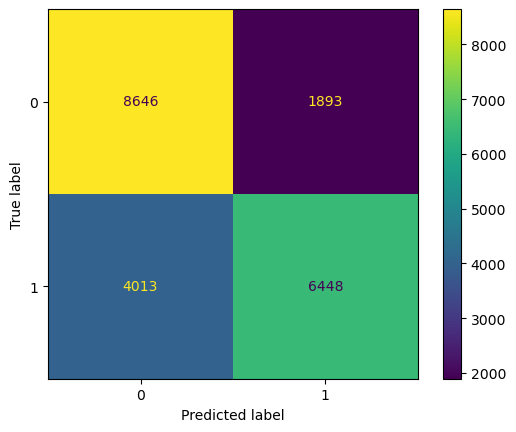

In [20]:
confusion_matrix_val = confusion_matrix(y_val, y_pre)
TN = confusion_matrix_val[0,0]
FP = confusion_matrix_val[0,1]
FN = confusion_matrix_val[1,0]
TP = confusion_matrix_val[1,1]
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_val)
cm = confusion_matrix(y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()


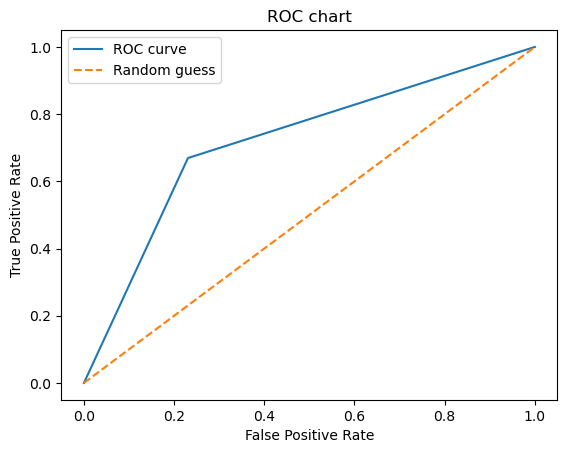

In [21]:
fpr, tpr, thresholds = roc_curve(y_val, y_pre)

plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0,1],[0,1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC chart')
plt.legend()
plt.show()

In [22]:

y_pred_proba = model.predict_proba(X_val)[:,1]
thresholds = np.arange(0.1, 1.0, 0.1)
best_threshold = None
best_metric = 0.0
for threshold in thresholds:
    y_pred = (y_pre > threshold).astype(int)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    metric = acc # Choose metric of interest (e.g., accuracy)
    if metric > best_metric:
        best_metric = metric
        best_threshold = threshold

print("Best threshold:", best_threshold)

Best threshold: 0.1
